In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ma = pd.read_table('/Users/guhan/Dropbox/ukbb-tools/13_mrp/biomarkers_mrp_rv_ma_exome_gbe.tsv.gz')
wb = pd.read_table('/Users/guhan/Dropbox/ukbb-tools/13_mrp/biomarkers_mrp_rv_exome_gbe.tsv.gz')
to_replace = ['log_10_BF_study_similar_var_independent_sigma_m_mpc_pli_pav', 'posterior_prob_w_prior_odds_0.0005_study_similar_var_independent_sigma_m_mpc_pli_pav', 'log_10_BF_study_similar_var_independent_sigma_m_mpc_pli_ptv', 'posterior_prob_w_prior_odds_0.0005_study_similar_var_independent_sigma_m_mpc_pli_ptv']
replacements = ['log_10_BF_study_independent_var_independent_sigma_m_mpc_pli_pav', 'posterior_prob_w_prior_odds_0.0005_study_independent_var_independent_sigma_m_mpc_pli_pav', 'log_10_BF_study_independent_var_independent_sigma_m_mpc_pli_ptv', 'posterior_prob_w_prior_odds_0.0005_study_independent_var_independent_sigma_m_mpc_pli_ptv']
for col1, col2 in zip(to_replace, replacements):
    ma[col1] = np.where(ma['num_pops'] == 1, ma[col2], ma[col1])

In [7]:
col = 'log_10_BF_study_similar_var_independent_sigma_m_mpc_pli_pav'
ma = ma[ma[col] >= 5]
wb = wb[wb[col] >= 5]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


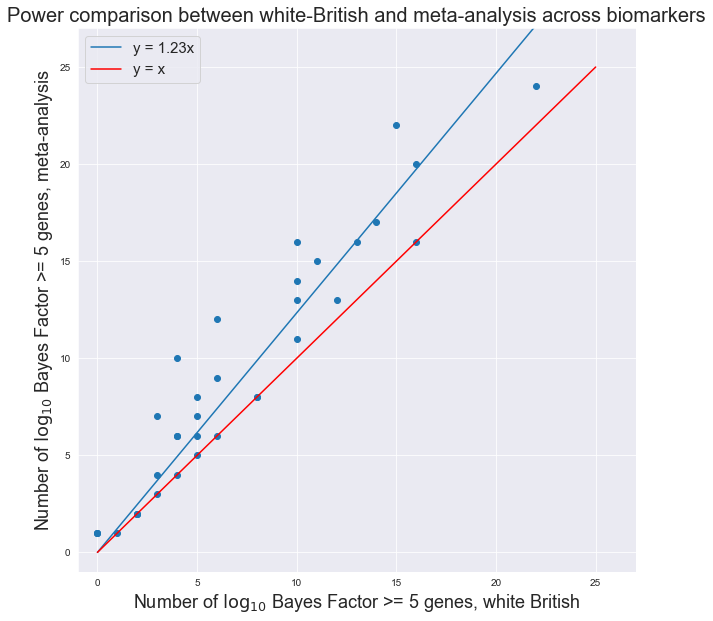

In [82]:
ma_hits = ma.groupby('GBE_short_name').count()['#GBE_ID'].reset_index()
ma_hits.columns = ['GBE_short_name', 'ma_hits']
wb_hits = wb.groupby('GBE_short_name').count()['#GBE_ID'].reset_index()
wb_hits.columns = ['GBE_short_name', 'wb_hits']

plt.figure(figsize=(10,10))
hits = ma_hits.merge(wb_hits, how='outer')
hits = hits.fillna(0)
sns.set_style('dark')
plt.scatter(hits['wb_hits'], hits['ma_hits'])

m, _, _, _ = np.linalg.lstsq(hits['wb_hits'][:,np.newaxis], hits['ma_hits'][:,np.newaxis])
x = np.linspace(0,25,26)
plt.plot(x, m[0][0]*x, label='y = ' + str(m[0][0])[:4] + 'x')
plt.xlabel('Number of $\log_{10}$ Bayes Factor >= 5 genes, white British', fontsize=18)
plt.ylabel('Number of $\log_{10}$ Bayes Factor >= 5 genes, meta-analysis', fontsize=18)
plt.title('Power comparison between white-British and meta-analysis across biomarkers', fontsize=20)
plt.xlim([-1,27])
plt.ylim([-1,27])
plt.plot(x, x, color='red', label='y = x')
plt.legend(fontsize=15)
plt.grid()
plt.show()